# this notebook is just for testing

In [1]:
from platform import python_version
print(python_version())

3.8.10


In [2]:
import os
import subprocess
import json
import numpy as np
import matplotlib.pyplot as pl
import tkinter as tk #to import file
from tkinter import filedialog #to open import dialog

In [6]:
def print_info(file):
    command = f"ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json {file}"
    cout = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
    jout = json.loads(cout)
    print(jout)
            
def get_bitrate(file):
    command = f"ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json {file}"
    cout = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
    jout = json.loads(cout)  # Convert data from JSON string to dictionary
    return int(jout["format"]["bit_rate"])

def get_vmaf(dist,ref):
    c_vmaf = f"ffmpeg -i {ref} -i {dist} -hide_banner -loglevel error\
            -lavfi \"[0:v]setpts=PTS-STARTPTS[ref];\
                    [1:v]scale={res[0]}x{res[1]}:flags=bicubic,setpts=PTS-STARTPTS[dist];\
                    [dist][ref]libvmaf=feature=name=psnr:log_path=config/vmaf_logs.json:log_fmt=json\" \
            -f null -" #|name=float_ssim|name=float_ms_ssim to compute the other metrics
    subprocess.call(c_vmaf, shell=True)
    print("-assessed= " + dist)
    with open("config/vmaf_logs.json", 'r') as r: #extract quality and rate values
        i_data = json.load(r)
    return i_data["pooled_metrics"]["vmaf"]["mean"]
    
def scale():
    c_seq = "ffmpeg -i test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m \
        -filter:v scale=480x270 test_vids/srcRAW_SD/rush_field_cuts_SDp.y4m"
    subprocess.call(c_seq, shell=True)
    
def open_file():
    root = tk.Tk()
    root.withdraw()
    f = os.path.relpath(filedialog.askopenfilename())
    #file_name = os.path.basename(source_path).split('.')[0]
    return f

res = [1920,1080]
#file = "tests_vids/OPT_vids/rush_fiel_vmaf90fx_AVC.mp4"
#file="tests_vids/OPT_vids/rush_fiel_rate1000000fx_AVC.mp4"
f_ref = "tests_vids/srcRAW_FullHD/SVT/mux_mix_50.y4m"
f_dist = "mix_50"
#print(get_bitrate(file))
#print(get_vmaf(file,f_ref,res))
print_info("/home/ubuntu/video_dynopt/tests_vids/srcRAW_4K/MERIDIAN_SHR_C_EN-XX_US-NR_51_LTRT_UHD_ML7_SL4_20160915_OV/MER_SHR_C_EN-XX_US-NR_51_LTRT_UHD_ML7_SL4_20160915_OV_00.mxf")
plot = {"PLOT": False, "FX": True, "BF": False, "LG": True, "CF": True, "TARGET": "dist"}

if plot["PLOT"]:
    my_dpi = 96
    pl.figure(figsize=(860/my_dpi, 540/my_dpi), dpi=my_dpi)

    if plot["FX"]:
        folder = "tests_vids/OPT_vids/"+f_dist+"/fx_"+plot["TARGET"]+"/"
        rate = np.zeros(len(os.listdir(folder)))
        dist = np.zeros(len(os.listdir(folder)))
        i = 0
        for vid in sorted(os.listdir(folder)):
            rate[i] = get_bitrate(folder + vid)
            dist[i] = get_vmaf(folder + vid,f_ref)
            i += 1
        print(rate)
        print(dist)
        pl.plot(rate/1000, dist, '-b', label="Fixed CRF")

    if plot["BF"]:
        folder = "tests_vids/OPT_vids/"+f_dist+"/bf_"+plot["TARGET"]+"/"
        rate = np.zeros(len(os.listdir(folder)))
        dist = np.zeros(len(os.listdir(folder)))
        i = 0
        for vid in sorted(os.listdir(folder)):
            rate[i] = get_bitrate(folder + vid)
            dist[i] = get_vmaf(folder + vid,f_ref)
            i += 1
        print(rate)
        print(dist)
        pl.plot(rate/1000, dist, '-g', label="OPT bf")

    if plot["LG"]:
        folder = "tests_vids/OPT_vids/"+f_dist+"/lg_"+plot["TARGET"]+"/"
        rate = np.zeros(len(os.listdir(folder)))
        dist = np.zeros(len(os.listdir(folder)))
        i = 0
        for vid in sorted(os.listdir(folder)):
            rate[i] = get_bitrate(folder + vid)
            dist[i] = get_vmaf(folder + vid,f_ref)
            i += 1
        print(rate)
        print(dist)
        pl.plot(rate/1000, dist, '-c', label="OPT lg")

    if plot["CF"]:
        folder = "tests_vids/OPT_vids/"+f_dist+"/cf_"+plot["TARGET"]+"/"
        rate = np.zeros(len(os.listdir(folder)))
        dist = np.zeros(len(os.listdir(folder)))
        i = 0
        for vid in sorted(os.listdir(folder)):
            rate[i] = get_bitrate(folder + vid)
            dist[i] = get_vmaf(folder + vid,f_ref)
            i += 1
        print(rate)
        print(dist)
        pl.plot(rate/1000, dist, '-r', label="OPT cf")

    pl.grid(True)
    pl.title("RQ \"Mix_50\" - 1080p AVC")
    pl.ylabel("Quality (VMAF)")
    pl.xlabel("Bitrate (Kbit/s)")
    pl.legend(loc="lower right")
    pl.figure()


{'programs': [], 'streams': [{'index': 0, 'codec_name': 'jpeg2000', 'codec_long_name': 'JPEG 2000', 'profile': '1351', 'codec_type': 'video', 'codec_tag_string': '[0][0][0][0]', 'codec_tag': '0x0000', 'width': 3840, 'height': 2160, 'coded_width': 3840, 'coded_height': 2160, 'closed_captions': 0, 'film_grain': 0, 'has_b_frames': 0, 'sample_aspect_ratio': '1:1', 'display_aspect_ratio': '16:9', 'pix_fmt': 'rgb48le', 'level': -99, 'field_order': 'progressive', 'refs': 1, 'r_frame_rate': '60000/1001', 'avg_frame_rate': '0/0', 'time_base': '1001/60000', 'start_pts': 0, 'start_time': '0.000000', 'duration_ts': 43093, 'duration': '718.934883', 'bits_per_raw_sample': '12', 'disposition': {'default': 0, 'dub': 0, 'original': 0, 'comment': 0, 'lyrics': 0, 'karaoke': 0, 'forced': 0, 'hearing_impaired': 0, 'visual_impaired': 0, 'clean_effects': 0, 'attached_pic': 0, 'timed_thumbnails': 0, 'captions': 0, 'descriptions': 0, 'metadata': 0, 'dependent': 0, 'still_image': 0}, 'tags': {'file_package_umid

In [ ]:
plot = {"FX": True, "BF": False, "LG": True, "CF": True, "TARGET": "dist"}

my_dpi = 96
pl.figure(figsize=(860/my_dpi, 540/my_dpi), dpi=my_dpi)

if plot["FX"]:
    rate = np.array()
    dist = np.array()
    pl.plot(rate/1000, dist, '-b', label="Fixed CRF")

if plot["BF"]:
    rate = np.array()
    dist = np.array()
    pl.plot(rate/1000, dist, '-g', label="OPT bf")

if plot["LG"]:
    rate = np.array()
    dist = np.array()
    pl.plot(rate/1000, dist, '-c', label="OPT lg")

if plot["CF"]:
    rate = np.array()
    dist = np.array()
    pl.plot(rate/1000, dist, '-r', label="OPT cf")

pl.grid(True)
pl.title("RQ \"Mix_50\" - 1080p AVC")
pl.ylabel("Quality (VMAF)")
pl.xlabel("Bitrate (Kbit/s)")
pl.legend(loc="lower right")
pl.figure()

In [679]:
rng = np.array([1,2,1,1,1])
print(np.var(rng))

0.16000000000000006


[[ 5.00782782e-01  0.00000000e+00 -8.53506685e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.53506685e-06  0.00000000e+00  5.98942156e-10]]
3.1554436208840472e-30


<Figure size 432x288 with 0 Axes>

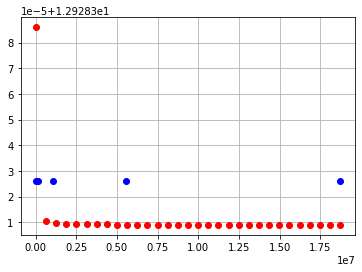

<Figure size 432x288 with 0 Axes>

In [677]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as pl
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz

def interval(l,n):
    """
    Split an interval (l[0],l[1]) into n values

    Input:
    - l : list(2)
        Boundaries of the interval to split
    - l : int
        Number of sub-intervals to define
    Output:
    - out : np.array(n+1)
        Array of CRFs values
    """
    w = (l[1] - l[0]) / (n - 1)
    return np.array([round(l[0]+i*w) for i in range(n)])
def translate(x, mx):
    lo = x.min()
    rng = x.max()-lo
    return (x-lo)*mx/rng
def expand(x,y,i,p):
    #number of points in between two init points
    ti = crf[i+1] - crf[i] + 1
    #ti linearly spaced numbers within the interval
    tx = np.linspace(x[i],x[i+1],num=ti,endpoint=True)
    #linear interpolation of points
    #if eq_fit(tx,*p).min() < 0:
        #ty = np.interp(eq_fit(tx,*p), (eq_fit(tx,*p).min(), eq_fit(tx,*p).max()), (dists[len(crf)-i-2],dists[len(crf)-i-1]))
    #else:
        #ty = eq_fit(tx,*p)
    ty = eq_fit(tx,*p)
    #cumulative trapezoid (n order) integrated value of ty(tx)
    cdf = cumtrapz(ty, tx, initial=0)
    #normalize [0,1]
    cdf *= (1/cdf[-1])
    #approximated function from tx points according to its distribution function
    intfunc = interp1d(cdf, tx, fill_value="extrapolate")
    #new x points
    o = intfunc(np.linspace(0, 1, ti, endpoint=True))
    return o[:-1]

def eq_fit(x, a, b, c):
    return a / (x + b) + c
def eq_rev(y, a, b, c):
    return a / (y - c) - b
def compute_slope(xl,yl,xr,yr):
    return -(yl-yr)/(xl-xr)
def as_slope(x, a):
    return a / (x ** 2)
def line(x, x1, y1):
    print("C-slope: "+str("%.16f" % as_slope(x1, par[0])))
    return -as_slope(x1, par[0])*(x - x1) + y1
def show_tangent(x1,y1):
    # Define x data range for tangent line
    xrange = np.linspace(x1-2000000, x1+2000000, 2)
    pl.plot(xrange, line(xrange, x1, y1), 'C1--', linewidth = 2)
    
def intrp(i):
    intv = crf[i+1]-crf[i]
    t = np.linspace(x[i],x[i+1],num=intv,endpoint=False)
    tn = density_space(t,eq_fit(t,*par),n=intv)
    return tn

#crf = np.array([10, 18, 25, 32, 40])
#rates = np.array([7894634,3112564,1254477,414777,95344])
#dists = 100 - np.array([99.625505,96.724404,88.985674,69.42523,31.051732])
crf = np.array([0, 13, 26, 38, 51])
rates = np.array([18729544, 5554671, 1085638, 138604, 12974])
dists = np.array([1.2928326e+01, 1.2928326e+01, 1.2928326e+01, 1.2928326e+01, 1.2928326e+01])
par, cov = curve_fit(eq_fit, rates, dists, bounds=((0,-np.inf,0),np.inf))
print(cov)
print(np.var(dists))
xnew = np.linspace(rates[-1],rates[0],num=31)
#x = np.flip(rates)
#xnew = np.flip(np.append(np.concatenate([expand(rates,dists,i,par) for i in range(len(crf)-1)]),rates[-1]))
#xnew = np.concatenate([np.linspace(x[i],x[i+1],num=crf[i+1]-crf[i],endpoint=False) for i in range(len(x)-1)])
#ynew = np.append(np.concatenate([np.interp(eq_fit(xnew[crf[i]-crf[0]:crf[i+1]-crf[0]+1],*par),(eq_fit(xnew[crf[i]-crf[0]:crf[i+1]-crf[0]+1],*par).min(),eq_fit(xnew[crf[i]-crf[0]:crf[i+1]-crf[0]+1],*par).max()),(dists[len(crf)-i-2],dists[len(crf)-i-1]))[:-1] for i in range(len(crf)-1)]),dists[0])
ynew = eq_fit(xnew,*par)
t_ext = compute_slope(rates[4],dists[4],rates[0],dists[0])
#print("t-slope: "+str("%.16f" % t_ext))
pl.plot(xnew, ynew, 'ro')
pl.plot(rates, dists, 'bo')
#show_tangent(xnew[28],fun_curve[28])
pl.grid(True)
pl.figure()

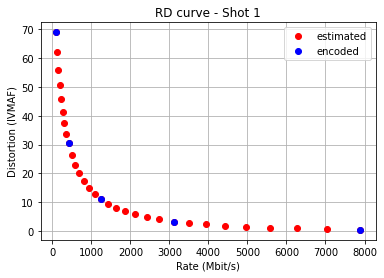

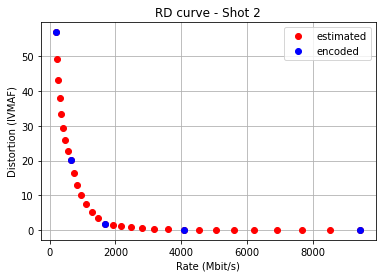

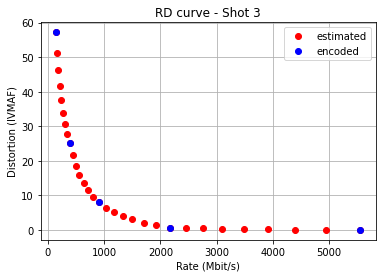

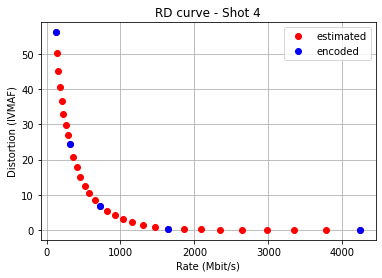

<Figure size 432x288 with 0 Axes>

In [698]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as pl
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz

cmp = {'rate': np.array([[7894634., 3112564., 1254477.,  414777.,   95344.],
       [9452621., 4096383., 1680954.,  640619.,  197328.],
       [5554681., 2178453.,  916086.,  388947.,  147226.],
       [4246505., 1648577.,  729488.,  324482.,  128924.]]), 'dist': np.array([[3.7449500e-01, 3.2755960e+00, 1.1014326e+01, 3.0574770e+01,
        6.8948268e+01],
       [5.2583000e-02, 1.1780400e-01, 1.7177010e+00, 2.0296656e+01,
        5.6965370e+01],
       [3.0934000e-02, 6.9047500e-01, 7.9802920e+00, 2.5134300e+01,
        5.7188043e+01],
       [3.4959000e-02, 2.2034700e-01, 6.7303290e+00, 2.4419002e+01,
        5.6138310e+01]])}

est = {'crf': np.array([40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24,
       23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]), 'rate': np.array([[  95344.        ,  122666.29326075,  152297.47190429,
         185085.75688589,  221673.36882872,  262564.16111345,
         308164.32498406,  358808.4466311 ,  414777.        ,
         495314.1654317 ,  583988.08999954,  684711.02140553,
         800259.52124636,  932712.3213452 , 1083686.49568688,
        1254477.        , 1438454.21212856, 1640475.4260935 ,
        1867515.98862921, 2124699.41097272, 2415956.32486343,
        2744401.12928005, 3112564.        , 3512275.41371709,
        3946358.77462348, 4429627.0281911 , 4973054.62589275,
        5585114.02700248, 6272550.78606464, 7040866.13395238,
        7894634.        ],
       [ 197328.        ,  229863.52701889,  264899.9363921 ,
         305858.88256313,  354736.66861102,  410955.36150942,
         476052.51014722,  552788.07845742,  640619.        ,
         738267.23510419,  845882.1071613 ,  969034.87094189,
        1111584.94392824, 1276374.15743589, 1465586.36274473,
        1680954.        , 1915355.19430961, 2173227.09013463,
        2464979.0881474 , 2798094.27776295, 3178225.71533837,
        3609800.64280048, 4096383.        , 4557753.18616938,
        5057835.88563373, 5610182.05073372, 6225118.44000923,
        6910786.60775257, 7673775.22300915, 8519528.28396126,
        9452621.        ],
       [ 147226.        ,  167260.25758694,  189024.35390379,
         213309.26298874,  240696.23943703,  271631.36610735,
         306468.19283734,  345494.01474602,  388947.        ,
         441301.23611718,  498771.09482638,  563293.38380681,
         636295.31289427,  718874.36817071,  811901.68844443,
         916086.        , 1040400.06044258, 1176983.15146742,
        1330757.35336996, 1505317.23414543, 1703408.99304191,
        1927201.66660999, 2178453.        , 2457051.34600515,
        2759743.99752347, 3097895.20293746, 3479820.42393638,
        3911881.62053154, 4399109.18553787, 4945583.21447215,
        5554681.        ],
       [ 128924.        ,  144829.39351749,  162114.19487522,
         181499.47015462,  203505.38057423,  228525.85477803,
         256869.98117885,  288786.94464658,  324482.        ,
         364951.68477172,  409344.69940766,  459086.2398142 ,
         515233.22276567,  578602.17705815,  649843.54433528,
         729488.        ,  821450.81306106,  922312.65154697,
        1035276.65682463, 1162721.60114773, 1306487.11891443,
        1468039.81420986, 1648577.        , 1861351.62597193,
        2092563.55153751, 2351383.04351696, 2644471.08746658,
        2976897.02317708, 3352653.1664619 , 3774967.45503612,
        4246505.        ]]), 'dist': np.array([[6.89482680e+01, 6.20441532e+01, 5.60053710e+01, 5.05981773e+01,
        4.57152921e+01, 4.13030939e+01, 3.73279954e+01, 3.37615408e+01,
        3.05747700e+01, 2.64641017e+01, 2.29929549e+01, 1.99533781e+01,
        1.72667042e+01, 1.48976259e+01, 1.28216733e+01, 1.10143260e+01,
        9.43645515e+00, 8.07902332e+00, 6.87919829e+00, 5.81041494e+00,
        4.85953951e+00, 4.01746775e+00, 3.27559600e+00, 2.74230640e+00,
        2.28127034e+00, 1.87098905e+00, 1.50223659e+00, 1.17070666e+00,
        8.73781626e-01, 6.09180063e-01, 3.74495000e-01],
       [5.69653700e+01, 4.93619124e+01, 4.33012792e+01, 3.80047207e+01,
        3.33068498e+01, 2.93016506e+01, 2.58578620e+01, 2.28490970e+01,
        2.02966560e+01, 1.63114524e+01, 1.29913529e+01, 1.01012136e+01,
        7.55898019e+00, 5.33046136e+00, 3.39175592e+00, 1.71770100e+00,
        1.38520142e+00, 1.10245081e+00, 8.54019982e-01, 6.33821881e-01,
        4.39021084e-01, 2.67655350e-01, 1.17804000e-01, 1.06146208e-01,
        9.59145197e-02, 8.67353264e-02, 7.84337056e-02, 7.09204880e-02,
        6.41393103e-02, 5.80427424e-02, 5.25830000e-02],
       [5.71880430e+01, 5.12492862e+01, 4.61379793e+01, 4.15993646e+01,
        3.75268596e+01, 3.38720334e+01, 3.06057711e+01, 2.77023642e+01,
        2.51343000e+01, 2.16468827e+01, 1.86415298e+01, 1.59826431e+01,
        1.36123021e+01, 1.15016218e+01, 9.63056622e+00, 7.98029200e+00,
        6.48624219e+00, 5.20487654e+00, 4.07414560e+00, 3.06829377e+00,
        2.17478525e+00, 1.38493826e+00, 6.90475000e-01, 5.67777176e-01,
        4.62423755e-01, 3.68980340e-01, 2.85203643e-01, 2.10088877e-01,
        1.43035487e-01, 8.35092365e-02, 3.09340000e-02],
       [5.61383100e+01, 5.01575965e+01, 4.50629158e+01, 4.05605931e+01,
        3.65347235e+01, 3.29358963e+01, 2.97351380e+01, 2.69059508e+01,
        2.44190020e+01, 2.08436337e+01, 1.77520735e+01, 1.50118073e+01,
        1.25650789e+01, 1.03825937e+01, 8.44399915e+00, 6.73032900e+00,
        5.41617135e+00, 4.27899761e+00, 3.27062063e+00, 2.36994453e+00,
        1.56622951e+00, 8.52011158e-01, 2.20347000e-01, 1.85617259e-01,
        1.55918213e-01, 1.29626620e-01, 1.06087716e-01, 8.50155219e-02,
        6.62407899e-02, 4.96108875e-02, 3.49590000e-02]])}

for i in range(4):
    pl.plot(est["rate"][i]/1000, est["dist"][i], 'ro', label="estimated")
    pl.plot(cmp["rate"][i]/1000, cmp["dist"][i], 'bo', label="encoded")
    pl.title("RD curve - Shot "+str(i+1))
    pl.ylabel("Distortion (IVMAF)")
    pl.xlabel("Rate (Mbit/s)")
    pl.legend(loc="upper right")
    pl.grid(True)
    pl.figure()

-assessed= tests_vids/OPT_vids/.old/rush1080/fx_rate/rush_fiel_rate07500fx_AVC.mp4
-assessed= tests_vids/OPT_vids/.old/rush1080/lg_rate/rush_fiel_rate07500lg_AVC.mp4
-assessed= tests_vids/OPT_vids/.old/rush1080/cf_rate/rush_fiel_rate07500cf_AVC.mp4


<Figure size 432x288 with 0 Axes>

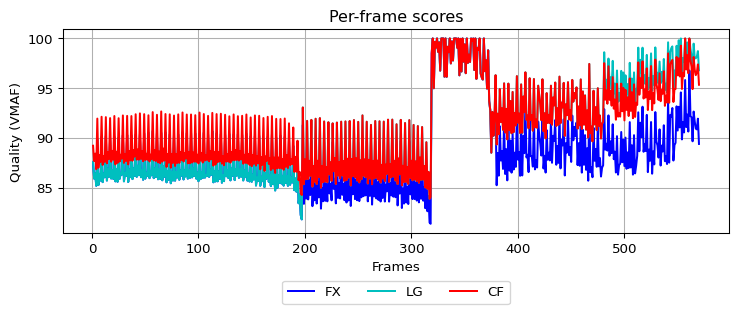

<Figure size 432x288 with 0 Axes>

In [747]:
#Per arricchire i grafici, anche in vista della tesi e della presentazione finale, 
#tracci il valore del VMAF nel tempo (cioe' vs numero del frame) per le varie tecniche, 
#per un caso significativo di differenza, possibilmente allo stesso bitrate o quasi, 
#in un punto con pendenza circa 45° (es. 800-1000 sul 720p). 
#Cosi' si vede se si guadagna principalmente in qualche shot o in tutte.

def perframe_vmaf(dist,ref):
    c_vmaf = f"ffmpeg -i {ref} -i {dist} -hide_banner -loglevel error\
            -lavfi \"[0:v]setpts=PTS-STARTPTS[ref];\
                    [1:v]scale={res[0]}x{res[1]}:flags=bicubic,setpts=PTS-STARTPTS[dist];\
                    [dist][ref]libvmaf=feature=name=psnr:log_path=config/vmaf_logs.json:log_fmt=json\" \
            -f null -" #|name=float_ssim|name=float_ms_ssim to compute the other metrics
    subprocess.call(c_vmaf, shell=True)
    print("-assessed= " + dist)
    with open("config/vmaf_logs.json", 'r') as r: #extract quality and rate values
        i_data = json.load(r)
    arr = np.zeros(len(i_data["frames"]))
    
    for f in i_data["frames"]:
        arr[f["frameNum"]] = f["metrics"]["vmaf"]
    return arr

my_dpi = 96
pl.figure(figsize=(860/my_dpi, 270/my_dpi), dpi=my_dpi)

res = [1920,1080]
f_ref = "tests_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m"
files = {"labels": ["FX","BF","LG","CF"], "colors": ["-b","-g","-c","-r"], 
         "files":["tests_vids/OPT_vids/.old/rush1080/fx_rate/rush_fiel_rate07500fx_AVC.mp4",
                  "",
                  "tests_vids/OPT_vids/.old/rush1080/lg_rate/rush_fiel_rate07500lg_AVC.mp4",
                  "tests_vids/OPT_vids/.old/rush1080/cf_rate/rush_fiel_rate07500cf_AVC.mp4"]}

for i in range(4):
    if files["files"][i] != "":
        y = perframe_vmaf(files["files"][i],f_ref)
        x = np.arange(1,len(y)+1,dtype=int)
        pl.plot(x, y, files["colors"][i], label=files["labels"][i])

pl.title("Per-frame scores")
pl.ylabel("Quality (VMAF)")
pl.xlabel("Frames")
pl.legend(bbox_to_anchor=(0.5, -0.35), loc="lower center", borderaxespad=0, ncol=3)
#pl.legend(loc="lower center", ncol=2)
pl.grid(True)
pl.figure()